### actual prediction sequence

In [1]:
import numpy as np
start_time ="05-04-17-00-11-12" #"05-03-17-19-06-14"#"05-02-17-13-55-40"
exps=["logistic"]
#exps=["logistic","traffic","climate"]
#models = ["basic_rnn", "basic_lstm", "matrix_rnn", "tensor_rnn", "tensor_rnn_einsum"]
models=["basic_lstm","tensor_rnn_einsum"]

preds = []
for exp in exps:
    for model in models:
        data_path = "/tmp/tensorRNN/log/"+exp+"/"+start_time+"/"+model
        file_name = "predict.npy"
        print(data_path+"/"+file_name)
        try:
            pred = np.load(data_path+"/"+file_name) 
            preds.append(np.asarray(pred))
        except IOError:
            'no file'    
print(np.shape(pred))


/tmp/tensorRNN/log/logistic/05-04-17-00-11-12/basic_lstm/predict.npy
/tmp/tensorRNN/log/logistic/05-04-17-00-11-12/tensor_rnn_einsum/predict.npy
(2, 9999, 1)


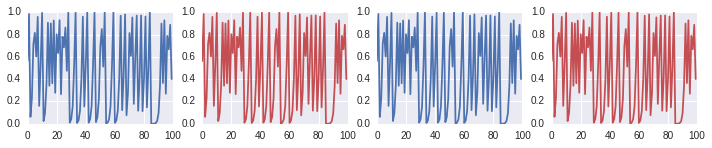

In [25]:
pred_lstm = preds[0]
pred_trnn = preds[1]
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 2)) #(9*16, width=3.5)

y_true, y_pred = pred_lstm
y_true = y_true[:100]
y_pred = y_pred[:100]
t = np.arange(0,len(y_true))
#plt.plot(t,y_pred,'r')

plt.subplot(1,4,1)
plt.plot(t,y_true,'b')


plt.subplot(1,4,2)
plt.plot(t,y_true,'r')


y_true, y_pred = pred_trnn
y_true = y_true[:100]
y_pred = y_pred[:100]
plt.subplot(1,4,3)
plt.plot(t,y_true,'b')

plt.subplot(1,4,4)
plt.plot(t,y_true,'r')

### projection of the weight vector